<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Train-Data" data-toc-modified-id="Train-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train Data</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Train-Data-Exploration" data-toc-modified-id="Train-Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Data Exploration</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Adding-values-to-new-column---LEGAL-TYPE-according-to-LEGAL-NAME-and-DOING-BUSINESS-AS-NAME-columns" data-toc-modified-id="Adding-values-to-new-column---LEGAL-TYPE-according-to-LEGAL-NAME-and-DOING-BUSINESS-AS-NAME-columns-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding values to new column - LEGAL TYPE according to LEGAL NAME and DOING BUSINESS AS NAME columns</a></span></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Preparation</a></span></li><li><span><a href="#Handling-Imbalanced-Data:-Oversampling" data-toc-modified-id="Handling-Imbalanced-Data:-Oversampling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Handling Imbalanced Data: Oversampling</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>K Nearest Neighbors</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forst" data-toc-modified-id="Random-Forst-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Random Forst</a></span></li></ul></div>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')
sns.set_palette("Set3", 9)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Train Data

In [2]:
train = pd.read_csv('train_file.csv')
train.head()

C:\Users\shrey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
train.shape

(85895, 32)

In [4]:
train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

## Test Data

In [5]:
test = pd.read_csv('test_file.csv')
test.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [6]:
test.shape

(57239, 31)

In [7]:
test.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [8]:
submission = pd.DataFrame({'ID': test['ID']})
submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [9]:
submission.shape

(57239, 1)

## Train Data Exploration

In [10]:
train.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [11]:
train.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [12]:
# Target variable
train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

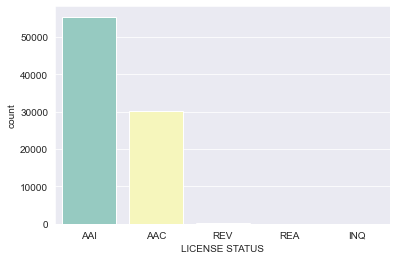

In [18]:
sns.countplot(train['LICENSE STATUS'])
plt.show()

Data is imbalanced.

In [19]:
train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [20]:
# delete columns which are not useful
del_cols = ['ID', 'LICENSE ID', 'ADDRESS', 'APPLICATION CREATED DATE', 'SSA', 'LOCATION']
train = train.drop(del_cols, axis = 1)
test = test.drop(del_cols, axis = 1)

In [21]:
train.shape

(85895, 26)

In [22]:
train.dtypes

ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TERM START DATE               object
LICENSE TERM EXPIRATION DATE          object
LICENSE APPROVED FOR ISSUANCE         object
DATE ISSUED                           object
LICENSE ST

In [24]:
train['APPLICATION REQUIREMENTS COMPLETE']

0        2002-06-28T00:00:00
1        2005-09-22T00:00:00
2        2009-07-22T00:00:00
3        2004-02-10T00:00:00
4        2008-03-24T00:00:00
                ...         
85890    2012-03-15T00:00:00
85891    2007-05-22T00:00:00
85892    2008-11-14T00:00:00
85893    2011-08-15T00:00:00
85894    2003-12-15T00:00:00
Name: APPLICATION REQUIREMENTS COMPLETE, Length: 85895, dtype: object

In [23]:
# Convert the Date columns from Object to DATETIME

def date_conversion(date_cols_list):
    for i in date_cols_list:
        train[i] = pd.to_datetime(train[i])
        test[i] = pd.to_datetime(test[i])

In [25]:
date_cols_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE',
                 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE']
date_conversion(date_cols_list)

In [26]:
train.dtypes

ACCOUNT NUMBER                                int64
SITE NUMBER                                   int64
LEGAL NAME                                   object
DOING BUSINESS AS NAME                       object
CITY                                         object
STATE                                        object
ZIP CODE                                     object
WARD                                        float64
PRECINCT                                    float64
WARD PRECINCT                                object
POLICE DISTRICT                             float64
LICENSE CODE                                  int64
LICENSE DESCRIPTION                          object
LICENSE NUMBER                              float64
APPLICATION TYPE                             object
APPLICATION REQUIREMENTS COMPLETE    datetime64[ns]
PAYMENT DATE                         datetime64[ns]
CONDITIONAL APPROVAL                         object
LICENSE TERM START DATE              datetime64[ns]
LICENSE TERM

In [27]:
test.dtypes

ACCOUNT NUMBER                                int64
SITE NUMBER                                   int64
LEGAL NAME                                   object
DOING BUSINESS AS NAME                       object
CITY                                         object
STATE                                        object
ZIP CODE                                    float64
WARD                                        float64
PRECINCT                                    float64
WARD PRECINCT                                object
POLICE DISTRICT                             float64
LICENSE CODE                                  int64
LICENSE DESCRIPTION                          object
LICENSE NUMBER                              float64
APPLICATION TYPE                             object
APPLICATION REQUIREMENTS COMPLETE    datetime64[ns]
PAYMENT DATE                         datetime64[ns]
CONDITIONAL APPROVAL                         object
LICENSE TERM START DATE              datetime64[ns]
LICENSE TERM

## Missing Values

In [28]:
train.isna().sum()

ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
LICENSE STATUS CHANGE DATE           55400
LATITUDE   

In [29]:
# define function to replace missing values with mean - for some numerical variables

def impute_mean(mean_list):
    for i in mean_list:
        train[i] = train[i].fillna(train[i].mean())
        test[i] = test[i].fillna(test[i].mean())

In [31]:
mean_list = ['LATITUDE', 'LONGITUDE']
impute_mean(mean_list)

In [32]:
# Fetching Year and Month from DATETIME columns
date_cols_list

['APPLICATION REQUIREMENTS COMPLETE',
 'PAYMENT DATE',
 'LICENSE TERM START DATE',
 'LICENSE TERM EXPIRATION DATE',
 'LICENSE APPROVED FOR ISSUANCE',
 'DATE ISSUED',
 'LICENSE STATUS CHANGE DATE']

In [33]:
# year
def get_year(yr_col, df_col):
    train[yr_col] = train[df_col].apply(lambda x: x.year)
    test[yr_col] = test[df_col].apply(lambda x: x.year)
    
# month
def get_month(month_col, df_col):
    train[month_col] = train[df_col].apply(lambda x: x.month)
    test[month_col] = test[df_col].apply(lambda x: x.month)

In [35]:
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE APPROVED FOR ISSUANCE YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('YEAR ISSUED', 'DATE ISSUED')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [36]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE           

In [39]:
# replacing null values for YEAR columns with round value of mean

mean_list = ['APPLICATION REQUIREMENTS COMPLETE YEAR', 'PAYMENT YEAR', 'LICENSE TERM START YEAR', 'LICENSE TERM EXPIRATION YEAR',
            'LICENSE APPROVED FOR ISSUANCE YEAR', 'LICENSE STATUS CHANGE YEAR']

def impute_round_mean(mean_list):
    for i in mean_list:
        train[i] = train[i].fillna(round(train[i].mean()))
        test[i] = test[i].fillna(round(test[i].mean()))
        
impute_round_mean(mean_list)

In [40]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE           

In [41]:
# create new column - License Validity (years)

train['LICENSE VALIDITY'] = abs(train['LICENSE TERM EXPIRATION YEAR'] - train['LICENSE TERM START YEAR'])
test['LICENSE VALIDITY'] = abs(test['LICENSE TERM EXPIRATION YEAR'] - test['LICENSE TERM START YEAR'])

In [43]:
# dropping columns which are not needed

cols = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE',
       'LICENSE APPROVED FOR ISSUANCE','DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LICENSE TERM START YEAR', 
        'LICENSE TERM EXPIRATION YEAR']

In [44]:
train = train.drop(cols, axis= 1)
test = test.drop(cols, axis= 1)

In [45]:
train.shape

(85895, 26)

In [46]:
test.shape

(57239, 25)

In [47]:
train.dtypes

ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
LEGAL NAME                                 object
DOING BUSINESS AS NAME                     object
CITY                                       object
STATE                                      object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
WARD PRECINCT                              object
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
LICENSE NUMBER                            float64
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
LATITUDE                                  float64
LONGITUDE                                 float64
LICENSE STATUS                             object
APPLICATION REQUIREMENTS COMPLETE YEAR    float64


In [48]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LATITUDE                                      0
LONGITUDE                                     0
LICENSE STATUS                                0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
PAYMENT YEAR                            

In [49]:
test.isna().sum()

ACCOUNT NUMBER                               0
SITE NUMBER                                  0
LEGAL NAME                                   0
DOING BUSINESS AS NAME                       2
CITY                                         0
STATE                                        0
ZIP CODE                                    12
WARD                                       626
PRECINCT                                  1578
WARD PRECINCT                              616
POLICE DISTRICT                           1475
LICENSE CODE                                 0
LICENSE DESCRIPTION                          0
LICENSE NUMBER                               0
APPLICATION TYPE                             0
CONDITIONAL APPROVAL                         0
LATITUDE                                     0
LONGITUDE                                    0
APPLICATION REQUIREMENTS COMPLETE YEAR       0
PAYMENT YEAR                                 0
PAYMENT MONTH                             1051
LICENSE APPRO

In [50]:
# replace NA values of DOING BUSINESS AS NAME with 'None'

def impute_none(none_list):
    for i in none_list:
        train[i] = train[i].fillna('None')
        test[i] = test[i].fillna('None')
        
none_list = ['DOING BUSINESS AS NAME']
impute_none(none_list)

In [51]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        0
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LATITUDE                                      0
LONGITUDE                                     0
LICENSE STATUS                                0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
PAYMENT YEAR                            

In [89]:
# replace missing values in ZIP CODE, WARD, PRECINCT, WARD PRECINCT, POLICE DISTRICT, LICENSE NUMBER, PAYMENT MONTH with 0:

def impute_0(list_0):
    for i in list_0:
        train[i] = train[i].fillna(0)
        test[i] = test[i].fillna(0)
        
list_0 = ['ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE NUMBER', 'PAYMENT MONTH']
impute_0(list_0)

In [90]:
train.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
LICENSE STATUS                            0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
LICENSE APPROVED FOR ISSUANCE YEAR        0
YEAR ISSUED                               0
LICENSE STATUS CHANGE YEAR      

In [91]:
test.isna().sum().sum()

0

In [57]:
train.tail()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,PAYMENT MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,YEAR ISSUED,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY
85890,8011,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,CHICAGO,IL,60607,11.0,28.0,11-28,...,41.863501,-87.642210,AAC,2012.0,2012.0,5.0,2012.0,2012,2012.0,2.0
85891,317725,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",MACHESNEY PARK,IL,61115,NaN,NaN,NaN,...,41.880952,-87.681165,AAI,2007.0,2007.0,5.0,2007.0,2007,2009.0,2.0
85892,8458,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,DOWNERS GROVE,IL,60515,NaN,NaN,NaN,...,41.880952,-87.681165,AAI,2008.0,2009.0,1.0,2009.0,2009,2009.0,2.0
85893,2156,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,CHICAGO,IL,60632,23.0,NaN,23-,...,41.799012,-87.723181,AAC,2011.0,2011.0,10.0,2011.0,2011,2012.0,2.0
85894,205936,1,JUAN CARLOS ERAZO,CASA DE JUAN RESTAURANT,CHICAGO,IL,60639,30.0,52.0,30-52,...,41.924004,-87.771507,AAC,2003.0,2004.0,2.0,2003.0,2004,2005.0,1.0


In [58]:
train['LEGAL NAME'].apply(lambda x: x.upper())
train['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test['LEGAL NAME'].apply(lambda x: x.upper())
test['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                           CSX INTERMODAL
2                     LOCOMOBILE LOFTS LLC
3                          ANNA F. JAMISON
4                                  DETAILS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                            INTERPARK
57236                         TOP CLEANERS
57237         D. C. A. TOWING INCORPORATED
57238             MARI'S CLEANING SERVICES
Name: DOING BUSINESS AS NAME, Length: 57239, dtype: object

In [59]:
train['LEGAL NAME'] = train['LEGAL NAME'].str.replace('.', '', regex= False)
train['DOING BUSINESS AS NAME'] = train['DOING BUSINESS AS NAME'].str.replace('.', '', regex= False)

test['LEGAL NAME'] = test['LEGAL NAME'].str.replace('.', '', regex= False)
test['DOING BUSINESS AS NAME'] = test['DOING BUSINESS AS NAME'].str.replace('.', '', regex= False)

In [60]:
train['LEGAL TYPE'] = 'PVT'
test['LEGAL TYPE'] = 'PVT'

In [67]:
train['LEGAL NAME'].unique().tolist()

['CARMEN CAHUE',
 'ISLA TROPICAL, INC',
 'DJS REMODELING',
 'ALL-BRY CONSTRUCTION CO',
 'MCDONOUGH MECHANICAL SERVICE',
 'QUALITY PLUMBING SERVICES INC',
 'FELIX BARRERA',
 'INTERSTATE MECHANICAL & CONSTRUCTION INC',
 'LESLIE LOCKETT',
 'JOY CHEMMACHEL',
 'EMILIO RODRIQUEZ',
 'ARTHUR FRANCIS',
 'FIDEL VILLEDA',
 'MILAN & LUKA BILJAN',
 'AMERICAN PRIDE HEATING & COOLING, INC',
 'LAYLA F JUDEH',
 'SODEXO MANAGEMENT, INC',
 'DESIGN INSTALLATION SYSTEMS INC',
 'NORTH AMERICAN MIDWAY ENTERTAINMENT ASTRO AMUSEMEN',
 'INNOVATIVE INSULATION',
 'THANH HANG THI TRUONG',
 'ERICKSON AMUSEMENTS, INC',
 'NORTHWEST AIRLINES INC',
 'NAUGHTON HEATING & AIR CONDITIONING',
 'B & N HEATING & AIR COND INC',
 'DAVID T MALLY',
 'MARIO P MAJEWSKI',
 'LOVATT & RADCLIFFE, LTD',
 'WOJCIECH NAZUR',
 'J & R AMUSEMENT CO INC',
 'WESTOWER COMMUNICATIONS, INC',
 'HERMINIA GARCIA',
 'CENTRAL PRINT SERVICES, INC',
 "AWGUL'S CORP",
 'SCANDINAVIAN BUILDERS LIMITED',
 'DEDERICHS HOME IMPROVEMENT CO',
 'M & T CREDIT SERVIC

In [68]:
train['DOING BUSINESS AS NAME'].unique().tolist()

["CLAUDIA'S BRIDAL SHOP",
 'ISLA TROPICAL',
 'DJS REMODELING, INC',
 'ALL-BRY CONSTRUCTION CO',
 'MCDONOUGH MECHANICAL SERVICE',
 'QUALITY PLUMBING SERVICES INC',
 'BARRERA CONSTRUCTION',
 'INTERSTATE MECHANICAL & CONSTRUCTION INC',
 'DELUXE CUSTOM  SERVICES',
 'FULLERTON PULASKI SHELL',
 'LANDSCAPER',
 'ANIMAL LOVERS PET SALON',
 'MAGIC MAID NATIONAL',
 'ALLWOOD CABINET COMPANY',
 'AMERICAN PRIDE HEATING & COOLING',
 'WESTERN DISCOUNT',
 'ABN AMRO SERVICES',
 'DESIGN INSTALLATION SYSTEMS INC',
 'NORTH AMERICAN MIDWAY ENTERTAINMENT-ASTRO AMUSEMEN',
 'INNOVATIVE INSULATION',
 'MAGIC TOUCH NAIL SALON & DAY SPA',
 'ERICKSON & HOLL AMUSEMENTS',
 'NORTHWEST AIRLINES AIR CARGO',
 'NAUGHTON HEATING & AIR CONDITIONING',
 'B & N HEATING & AIR CONDITION',
 'MALLY MECHANICAL CONSORTIUM',
 'FLOOD SPECIALISTS',
 'LOVATT & RADCLIFFE',
 'WM ROOFING & MASONRY',
 'J & R AMUSEMENT',
 'WESTOWER COMMUNICATIONS,INC',
 'HERMINIA GARCIA',
 'CENTRAL PRINT SERVICES',
 'PODLASIE',
 'SCANDINAVIAN BUILDERS LTD',


## Adding values to new column - LEGAL TYPE according to LEGAL NAME and DOING BUSINESS AS NAME columns

In [69]:
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('INC'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train['LEGAL TYPE'])

test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('INC'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test['LEGAL TYPE'])

In [70]:
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('LLC'), 'LLC', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train['LEGAL TYPE'])

test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('LLC'), 'LLC', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test['LEGAL TYPE'])

In [71]:
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('CORP'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('CO'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train['LEGAL TYPE'])

test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('CORP'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('CO'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test['LEGAL TYPE'])

In [72]:
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('LTD'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train['LEGAL TYPE'])

test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['LEGAL NAME'].str.contains('LTD'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE'] = np.where(test['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test['LEGAL TYPE'])

In [73]:
train['LEGAL TYPE'].unique().tolist()

['PVT', 'INC', 'CORP', 'LTD', 'LLC']

In [74]:
train['LEGAL TYPE'].value_counts()

CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [75]:
# dropping columns LEGAL NAME and DOING BUSINESS AS NAME
train.drop(['LEGAL NAME', 'DOING BUSINESS AS NAME'], axis= 1, inplace= True)
test.drop(['LEGAL NAME', 'DOING BUSINESS AS NAME'], axis= 1, inplace= True)

In [76]:
train.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE', 'ZIP CODE', 'WARD',
       'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'CONDITIONAL APPROVAL', 'LATITUDE', 'LONGITUDE', 'LICENSE STATUS',
       'APPLICATION REQUIREMENTS COMPLETE YEAR', 'PAYMENT YEAR',
       'PAYMENT MONTH', 'LICENSE APPROVED FOR ISSUANCE YEAR', 'YEAR ISSUED',
       'LICENSE STATUS CHANGE YEAR', 'LICENSE VALIDITY', 'LEGAL TYPE'],
      dtype='object')

In [82]:
l1 = train['LICENSE DESCRIPTION'].unique().tolist()
l1.sort()
l1

['Accessory Garage',
 'Affiliation',
 'Airport Pushcart Liquor Midway - Class A',
 "Airport Pushcart Liquor O'Hare - Class A",
 'Animal Care Facility',
 'Animal Care License',
 'Animal Exhibition',
 'Assisted Living/Shared Housing Establishment',
 'Auctioneer',
 'Automatic Amusement Device Operator',
 'Bed-And-Breakfast Establishment',
 'Bicycle Messenger Service',
 'Board-Up Work',
 'Body Piercing',
 'Broker',
 "Caterer's Liquor License",
 "Caterer's Registration (Liquor)",
 "Children's Activities Facilities",
 'Consumption on Premises - Incidental Activity',
 'Day Care Center 2 - 6 Years',
 'Day Care Center Under 2 Years',
 'Day Care Center Under 2 and 2 - 6 Years',
 'Day Labor Agency',
 'Electronic Equipment Repair',
 'Expediter - Class A',
 'Expediter - Class B',
 'Expediter - Class B Employee',
 'Explosives',
 'Explosives, Certificate of Fitness',
 'Filling Station',
 'Grooming Facility',
 'Guard Dog Service',
 'Hazardous Materials',
 'Home Occupation',
 'Home Repair',
 'Hospital'

In [83]:
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 
                                                                    'Day Care Center')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')

train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')

train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)',
                                                                   'Motor Vehicle Repair')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)',
                                                                   'Motor Vehicle Repair')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)',
                                                                   'Motor Vehicle Repair')

train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special',
                                                                    'Peddler')

train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')

train['LICENSE Dtest['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 
                                                                    'Day Care Center')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')

test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')

test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)',
                                                                   'Motor Vehicle Repair')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)',
                                                                   'Motor Vehicle Repair')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)',
                                                                   'Motor Vehicle Repair')

test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special',
                                                                    'Peddler')

test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')

test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 
                                                                    'Tire Facility')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 
                                                                    'Tire Facility')
test['LICENSE DESCRIPTION'] = test['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 
                                                                    'Tire Facility')ESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 
                                                                    'Tire Facility')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 
                                                                    'Tire Facility')
train['LICENSE DESCRIPTION'] = train['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 
                                                                    'Tire Facility')

In [85]:
train['LICENSE DESCRIPTION'].unique()

array(['Limited Business License', 'Mobile Food Dispenser', 'Home Repair',
       'Motor Vehicle Repair', 'Kennels and Catteries',
       'Hazardous Materials', 'Retail Food Establishment',
       'Automatic Amusement Device Operator', 'Home Occupation',
       'Peddler', 'Music and Dance', 'Street Performer', 'Body Piercing',
       'Massage Therapist', 'Veterinary Hospital', 'Auctioneer', 'Broker',
       'Residential Real Estate Developer', 'Electronic Equipment Repair',
       'Filling Station', 'Valet Parking Operator', 'Scavenger, Private',
       'Repossessor', 'Tavern',
       'Mobile Frozen Desserts Dispenser - Non-Motorized',
       'Grooming Facility', 'Package Goods', 'Retail Computing Center',
       'Consumption on Premises - Incidental Activity', 'Outdoor Patio',
       'Junk Peddler', 'Manufacturing Establishments',
       'Tobacco Dealer Wholesale', 'Tobacco Vending, Individual',
       'Laundry, Late Hour', 'Tire Facility', 'Pet Shop',
       'Bed-And-Breakfast Establ

## Model Preparation

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   CITY                                    85895 non-null  object 
 3   STATE                                   85895 non-null  object 
 4   ZIP CODE                                85895 non-null  object 
 5   WARD                                    85895 non-null  float64
 6   PRECINCT                                85895 non-null  float64
 7   WARD PRECINCT                           85895 non-null  object 
 8   POLICE DISTRICT                         85895 non-null  float64
 9   LICENSE CODE                            85895 non-null  int64  
 10  LICENSE DESCRIPTION                     85895 non-null  ob

In [103]:
train.shape

(85895, 25)

In [106]:
train['ZIP CODE'].dtypes

dtype('O')

In [109]:
# converting categorical variables to numbers using One Hot Encoder

encoder = LabelEncoder()
train['CITY'] = encoder.fit_transform(train['CITY'])
train['STATE'] = encoder.fit_transform(train['STATE'])
train['ZIP CODE'] = encoder.fit_transform(train['ZIP CODE'].astype(str))
train['WARD PRECINCT'] = encoder.fit_transform(train['WARD PRECINCT'].astype(str))
train['LICENSE DESCRIPTION'] = encoder.fit_transform(train['LICENSE DESCRIPTION'])
train['APPLICATION TYPE'] = encoder.fit_transform(train['APPLICATION TYPE'])
train['CONDITIONAL APPROVAL'] = encoder.fit_transform(train['CONDITIONAL APPROVAL'])
train['LEGAL TYPE'] = encoder.fit_transform(train['LEGAL TYPE'])
train.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,PAYMENT MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,YEAR ISSUED,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,32811,1,193,16,625,22.0,28.0,689,10.0,1010,...,-87.714618,0,2002.0,2002.0,8.0,2002.0,2006,2009.0,1.0,4
1,262311,29,193,16,612,33.0,23.0,1230,17.0,1315,...,-87.699626,1,2005.0,2005.0,11.0,2006.0,2006,2006.0,1.0,1
2,345008,1,466,16,32,0.0,0.0,1,0.0,1011,...,-87.681165,0,2009.0,2009.0,7.0,2009.0,2009,2009.0,2.0,1
3,273121,1,585,16,370,0.0,0.0,1,0.0,1010,...,-87.681165,0,2004.0,2004.0,2.0,2004.0,2004,2009.0,1.0,0
4,213785,1,1145,16,109,0.0,0.0,1,0.0,1010,...,-87.681165,0,2008.0,2008.0,6.0,2008.0,2008,2009.0,2.0,4


In [110]:
test['CITY'] = encoder.fit_transform(test['CITY'])
test['STATE'] = encoder.fit_transform(test['STATE'])
test['ZIP CODE'] = encoder.fit_transform(test['ZIP CODE'].astype(str))
test['WARD PRECINCT'] = encoder.fit_transform(test['WARD PRECINCT'].astype(str))
test['LICENSE DESCRIPTION'] = encoder.fit_transform(test['LICENSE DESCRIPTION'])
test['APPLICATION TYPE'] = encoder.fit_transform(test['APPLICATION TYPE'])
test['CONDITIONAL APPROVAL'] = encoder.fit_transform(test['CONDITIONAL APPROVAL'])
test['LEGAL TYPE'] = encoder.fit_transform(test['LEGAL TYPE'])
test.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LATITUDE,LONGITUDE,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,PAYMENT MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,YEAR ISSUED,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,280120,1,59,13,256,42.0,67.0,1771,18.0,1020,...,41.890047,-87.637467,2011.0,2012.0,1.0,2012.0,2012,2012.0,2.0,2
1,65043,1,59,13,281,16.0,5.0,339,7.0,1010,...,41.786485,-87.676665,2011.0,2012.0,11.0,2012.0,2012,2012.0,2.0,1
2,281270,1,59,13,251,4.0,8.0,1624,1.0,1020,...,41.868269,-87.625695,2004.0,2004.0,12.0,2004.0,2004,2011.0,1.0,0
3,335243,1,59,13,312,9.0,33.0,2430,5.0,1607,...,41.655762,-87.608686,2010.0,2010.0,11.0,2008.0,2010,2012.0,2.0,4
4,283018,3,59,13,277,15.0,26.0,278,9.0,1010,...,41.816969,-87.699785,2007.0,2007.0,8.0,2007.0,2007,2008.0,2.0,0


In [92]:
# Target Variable
train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [93]:
train['LICENSE STATUS'] = train['LICENSE STATUS'].replace('AAI', 0)
train['LICENSE STATUS'] = train['LICENSE STATUS'].replace('AAC', 1)
train['LICENSE STATUS'] = train['LICENSE STATUS'].replace('REV', 2)
train['LICENSE STATUS'] = train['LICENSE STATUS'].replace('REA', 3)
train['LICENSE STATUS'] = train['LICENSE STATUS'].replace('INQ', 4)

In [114]:
train.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE', 'ZIP CODE', 'WARD',
       'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'CONDITIONAL APPROVAL', 'LATITUDE', 'LONGITUDE', 'LICENSE STATUS',
       'APPLICATION REQUIREMENTS COMPLETE YEAR', 'PAYMENT YEAR',
       'PAYMENT MONTH', 'LICENSE APPROVED FOR ISSUANCE YEAR', 'YEAR ISSUED',
       'LICENSE STATUS CHANGE YEAR', 'LICENSE VALIDITY', 'LEGAL TYPE'],
      dtype='object')

In [118]:
test.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE', 'ZIP CODE', 'WARD',
       'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'CONDITIONAL APPROVAL', 'LATITUDE', 'LONGITUDE',
       'APPLICATION REQUIREMENTS COMPLETE YEAR', 'PAYMENT YEAR',
       'PAYMENT MONTH', 'LICENSE APPROVED FOR ISSUANCE YEAR', 'YEAR ISSUED',
       'LICENSE STATUS CHANGE YEAR', 'LICENSE VALIDITY', 'LEGAL TYPE'],
      dtype='object')

In [133]:
train['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [119]:
X = train.drop(['LICENSE STATUS'], axis = 1)
y = train['LICENSE STATUS']

In [130]:
X.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LATITUDE,LONGITUDE,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,PAYMENT MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,YEAR ISSUED,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
0,32811,1,193,16,625,22.0,28.0,689,10.0,1010,...,41.843613,-87.714618,2002.0,2002.0,8.0,2002.0,2006,2009.0,1.0,4
1,262311,29,193,16,612,33.0,23.0,1230,17.0,1315,...,41.961132,-87.699626,2005.0,2005.0,11.0,2006.0,2006,2006.0,1.0,1
2,345008,1,466,16,32,0.0,0.0,1,0.0,1011,...,41.880952,-87.681165,2009.0,2009.0,7.0,2009.0,2009,2009.0,2.0,1
3,273121,1,585,16,370,0.0,0.0,1,0.0,1010,...,41.880952,-87.681165,2004.0,2004.0,2.0,2004.0,2004,2009.0,1.0,0
4,213785,1,1145,16,109,0.0,0.0,1,0.0,1010,...,41.880952,-87.681165,2008.0,2008.0,6.0,2008.0,2008,2009.0,2.0,4


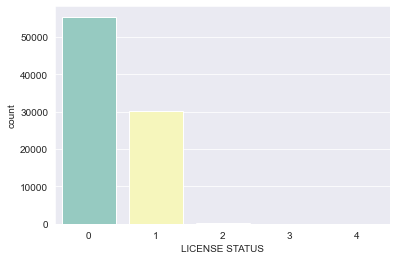

In [134]:
sns.countplot(y)
plt.show()

## Handling Imbalanced Data: Oversampling

In [142]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)
print("Before oversampling: ", Counter(y_train))

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print("After oversampling: ", Counter(y_train_over))

Before oversampling:  Counter({0: 38847, 1: 21078, 2: 198, 4: 2, 3: 1})
After oversampling:  Counter({0: 38847, 3: 38847, 1: 21078, 2: 198, 4: 2})


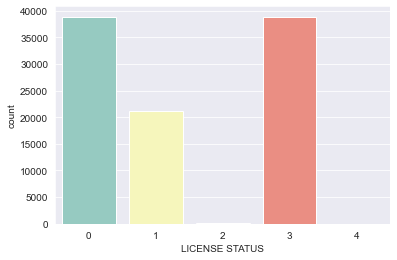

In [144]:
sns.countplot(y_train_over)
plt.show()

## Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
y_pred = lr.predict(X_test)

# accuracy
lr_accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
lr_accuracy

66.26

In [162]:
# Confusion Matrix

def c_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0]).T
    sns.heatmap(cm, annot= True, fmt = '0.2f', xticklabels= ['Yes','No'], yticklabels= ['Yes','No'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

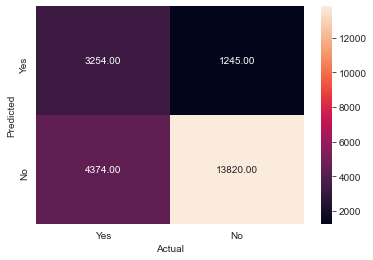

In [163]:
c_matrix(y_test, y_pred)

## K Nearest Neighbors

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_over, y_train_over)

y_pred = knn.predict(X_test)

In [165]:
# accuracy

knn_accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
knn_accuracy

80.27

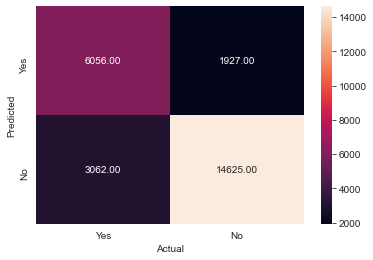

In [166]:
# confusion matrix

c_matrix(y_test, y_pred)

## Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_over, y_train_over)

dtc.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
dtc_accuracy =  round(metrics.accuracy_score(y_test, y_pred)*100, 2)
dtc_accuracy

80.27

In [170]:
# hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features' : ['log2', 'sqrt', 'auto'], 'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 5, 10, 30, 50],
             'min_samples_split' : [2, 5, 50, 100], 'min_samples_leaf' : [1, 5, 10, 15]}

# Grid Search
grid = GridSearchCV(dtc, parameters)
grid = grid.fit(X_train_over, y_train_over)

dtc = grid.best_estimator_
dtc.fit(X_train_over, y_train_over)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='auto',
                       min_samples_split=100)

In [171]:
y_pred = dtc.predict(X_test)

#accuracy
dtc_accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
dtc_accuracy

97.81

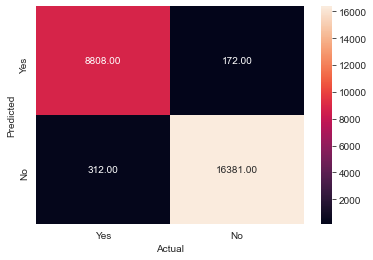

In [172]:
# confusion matrix

c_matrix(y_test, y_pred)

## Random Forst

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)

y_pred = rf.predict(X_test)

In [175]:
# accuracy
rf_accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
rf_accuracy

99.0

In [181]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9890947786275189

We have got the highest prediction accuracy by using Random Forest Classifier.
Accuracy = 99%

In [176]:
# Prediction on Test Data set:

test_pred = rf.predict(test.values)

In [177]:
submission

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816
...,...
57234,1743194-20070816
57235,2032383-20160716
57236,40376-20020216
57237,2064176-20121116


In [178]:
submission['LICENSE STATUS'] = test_pred

In [179]:
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(0, 'AAI')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(1, 'AAC')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(2, 'REV')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(3, 'REA')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(4, 'INQ')

In [180]:
submission.to_csv('submission.csv', index = False)